In [69]:
import numpy as np
from pylab import *
import scipy
from scipy import ndimage as ndi


In zemax with 2711-desi-0034-v1-red vphg lvm-0019 I did the following:

I created an aperture in front of the camera that has an 85 mm "left/right" Hartmann mask.

I adjusted focus in increments of 12 micron.

I use geometric image analysis to estimate the Hartman PSF

In [4]:
focus = [-24, -12, 0, 12, 24]
texts = r"""
Image analysis histogram listing -24

File : C:\Users\npk\Dropbox\LENS DESGINS\Systems\DESI ANALYSIS\HARTMANN 2711-DESI-0034-V1-red vphg LVM-0019.zmx
Title: 2013/08/22 DESI Spectrograph f/3.57 (no corrector) Design
Date : 2/16/2021
Configuration 1 of 3

Field Width                    : 0.05 Millimeters
Image Width                    : 0.09 Millimeters
Number of pixels               : 6 x 6
Total Weight of Rays Attempted :   1.505000E+04
Total Weight of Rays Passed    :   3.570000E+03
Total Rays Launched            : 15050
Percent Efficiency             :   23.72 %
Total flux in watts            : 2.372E-01
Units                          : Watts/Millimeters squared

  0.0000E+00	  0.0000E+00	  0.0000E+00	  0.0000E+00	  0.0000E+00	  0.0000E+00
  0.0000E+00	  0.0000E+00	  1.3289E+01	  2.8645E+01	  0.0000E+00	  0.0000E+00
  0.0000E+00	  7.9734E+00	  3.1244E+02	  2.7730E+02	  0.0000E+00	  0.0000E+00
  0.0000E+00	  4.7250E+00	  2.3595E+02	  1.6419E+02	  0.0000E+00	  0.0000E+00
  0.0000E+00	  0.0000E+00	  4.7250E+00	  5.0203E+00	  0.0000E+00	  0.0000E+00
  0.0000E+00	  0.0000E+00	  0.0000E+00	  0.0000E+00	  0.0000E+00	  0.0000E+00
  
Image analysis histogram listing

File : C:\Users\npk\Dropbox\LENS DESGINS\Systems\DESI ANALYSIS\HARTMANN 2711-DESI-0034-V1-red vphg LVM-0019.zmx
Title: 2013/08/22 DESI Spectrograph f/3.57 (no corrector) Design
Date : 2/16/2021
Configuration 2 of 3

Field Width                    : 0.05 Millimeters
Image Width                    : 0.09 Millimeters
Number of pixels               : 6 x 6
Total Weight of Rays Attempted :   1.505000E+04
Total Weight of Rays Passed    :   3.970000E+03
Total Rays Launched            : 15050
Percent Efficiency             :   26.38 %
Total flux in watts            : 2.638E-01
Units                          : Watts/Millimeters squared

  0.0000E+00	  0.0000E+00	  0.0000E+00	  0.0000E+00	  0.0000E+00	  0.0000E+00
  0.0000E+00	  0.0000E+00	  8.8594E-01	  5.6109E+00	  0.0000E+00	  0.0000E+00
  0.0000E+00	  1.7719E+00	  2.0377E+02	  1.7571E+02	  2.6578E+00	  0.0000E+00
  0.0000E+00	  1.0041E+01	  4.2289E+02	  2.7316E+02	  5.9062E-01	  0.0000E+00
  0.0000E+00	  0.0000E+00	  4.9908E+01	  2.5397E+01	  0.0000E+00	  0.0000E+00
  0.0000E+00	  0.0000E+00	  0.0000E+00	  0.0000E+00	  0.0000E+00	  0.0000E+00

Image analysis histogram listing

File : C:\Users\npk\Dropbox\LENS DESGINS\Systems\DESI ANALYSIS\HARTMANN 2711-DESI-0034-V1-red vphg LVM-0019.zmx
Title: 2013/08/22 DESI Spectrograph f/3.57 (no corrector) Design
Date : 2/16/2021
Configuration 3 of 3

Field Width                    : 0.05 Millimeters
Image Width                    : 0.09 Millimeters
Number of pixels               : 6 x 6
Total Weight of Rays Attempted :   1.505000E+04
Total Weight of Rays Passed    :   8.378000E+03
Total Rays Launched            : 15050
Percent Efficiency             :   55.67 %
Total flux in watts            : 5.567E-01
Units                          : Watts/Millimeters squared

  0.0000E+00	  0.0000E+00	  0.0000E+00	  0.0000E+00	  0.0000E+00	  0.0000E+00
  0.0000E+00	  0.0000E+00	  1.6537E+01	  2.9827E+01	  0.0000E+00	  0.0000E+00
  0.0000E+00	  1.1222E+01	  6.0155E+02	  5.0705E+02	  3.5437E+00	  0.0000E+00
  0.0000E+00	  2.3034E+01	  7.1790E+02	  4.9169E+02	  0.0000E+00	  0.0000E+00
  0.0000E+00	  0.0000E+00	  4.9612E+01	  2.2148E+01	  0.0000E+00	  0.0000E+00
  0.0000E+00	  0.0000E+00	  0.0000E+00	  0.0000E+00	  0.0000E+00	  0.0000E+00

Image analysis histogram listing

-------------------------------------------------------------------
File : C:\Users\npk\Dropbox\LENS DESGINS\Systems\DESI ANALYSIS\HARTMANN 2711-DESI-0034-V1-red vphg LVM-0019.zmx
Title: 2013/08/22 DESI Spectrograph f/3.57 (no corrector) Design
Date : 2/16/2021
Configuration 1 of 3

Field Width                    : 0.05 Millimeters
Image Width                    : 0.09 Millimeters
Number of pixels               : 6 x 6
Total Weight of Rays Attempted :   1.505000E+04
Total Weight of Rays Passed    :   3.499000E+03
Total Rays Launched            : 15050
Percent Efficiency             :   23.25 %
Total flux in watts            : 2.325E-01
Units                          : Watts/Millimeters squared

  0.0000E+00	  0.0000E+00	  0.0000E+00	  0.0000E+00	  0.0000E+00	  0.0000E+00
  0.0000E+00	  0.0000E+00	  5.3156E+00	  1.3289E+01	  0.0000E+00	  0.0000E+00
  0.0000E+00	  0.0000E+00	  2.3743E+02	  3.0063E+02	  5.9062E-01	  0.0000E+00
  0.0000E+00	  5.9062E-01	  2.2887E+02	  2.2621E+02	  0.0000E+00	  0.0000E+00
  0.0000E+00	  0.0000E+00	  8.8594E+00	  1.1517E+01	  0.0000E+00	  0.0000E+00
  0.0000E+00	  0.0000E+00	  0.0000E+00	  0.0000E+00	  0.0000E+00	  0.0000E+00


Image analysis histogram listing

File : C:\Users\npk\Dropbox\LENS DESGINS\Systems\DESI ANALYSIS\HARTMANN 2711-DESI-0034-V1-red vphg LVM-0019.zmx
Title: 2013/08/22 DESI Spectrograph f/3.57 (no corrector) Design
Date : 2/16/2021
Configuration 2 of 3

Field Width                    : 0.05 Millimeters
Image Width                    : 0.09 Millimeters
Number of pixels               : 6 x 6
Total Weight of Rays Attempted :   1.505000E+04
Total Weight of Rays Passed    :   4.005000E+03
Total Rays Launched            : 15050
Percent Efficiency             :   26.61 %
Total flux in watts            : 2.661E-01
Units                          : Watts/Millimeters squared

  0.0000E+00	  0.0000E+00	  0.0000E+00	  0.0000E+00	  0.0000E+00	  0.0000E+00
  0.0000E+00	  0.0000E+00	  1.7719E+00	  1.5061E+01	  1.4766E+00	  0.0000E+00
  0.0000E+00	  0.0000E+00	  1.9756E+02	  2.3005E+02	  1.5356E+01	  0.0000E+00
  0.0000E+00	  2.9531E-01	  3.6028E+02	  3.1776E+02	  1.4766E+00	  0.0000E+00
  0.0000E+00	  0.0000E+00	  2.7169E+01	  1.4470E+01	  0.0000E+00	  0.0000E+00
  0.0000E+00	  0.0000E+00	  0.0000E+00	  0.0000E+00	  0.0000E+00	  0.0000E+00

Image analysis histogram listing

File : C:\Users\npk\Dropbox\LENS DESGINS\Systems\DESI ANALYSIS\HARTMANN 2711-DESI-0034-V1-red vphg LVM-0019.zmx
Title: 2013/08/22 DESI Spectrograph f/3.57 (no corrector) Design
Date : 2/16/2021
Configuration 3 of 3

Field Width                    : 0.05 Millimeters
Image Width                    : 0.09 Millimeters
Number of pixels               : 6 x 6
Total Weight of Rays Attempted :   1.505000E+04
Total Weight of Rays Passed    :   8.485000E+03
Total Rays Launched            : 15050
Percent Efficiency             :   56.38 %
Total flux in watts            : 5.638E-01
Units                          : Watts/Millimeters squared

  0.0000E+00	  0.0000E+00	  0.0000E+00	  0.0000E+00	  0.0000E+00	  0.0000E+00
  0.0000E+00	  0.0000E+00	  3.5437E+00	  2.8055E+01	  5.9062E-01	  0.0000E+00
  0.0000E+00	  5.9062E-01	  5.1384E+02	  5.9535E+02	  1.2994E+01	  0.0000E+00
  0.0000E+00	  2.0672E+00	  6.9487E+02	  5.8944E+02	  1.1812E+00	  0.0000E+00
  0.0000E+00	  0.0000E+00	  3.4256E+01	  2.8941E+01	  0.0000E+00	  0.0000E+00
  0.0000E+00	  0.0000E+00	  0.0000E+00	  0.0000E+00	  0.0000E+00	  0.0000E+00

Image analysis histogram listing


-------------------------------------------------------------------
File : C:\Users\npk\Dropbox\LENS DESGINS\Systems\DESI ANALYSIS\HARTMANN 2711-DESI-0034-V1-red vphg LVM-0019.zmx
Title: 2013/08/22 DESI Spectrograph f/3.57 (no corrector) Design
Date : 2/16/2021
Configuration 1 of 3

Field Width                    : 0.05 Millimeters
Image Width                    : 0.09 Millimeters
Number of pixels               : 6 x 6
Total Weight of Rays Attempted :   1.505000E+04
Total Weight of Rays Passed    :   3.449000E+03
Total Rays Launched            : 15050
Percent Efficiency             :   22.92 %
Total flux in watts            : 2.292E-01
Units                          : Watts/Millimeters squared

  0.0000E+00	  0.0000E+00	  0.0000E+00	  0.0000E+00	  0.0000E+00	  0.0000E+00
  0.0000E+00	  0.0000E+00	  2.9531E-01	  5.6109E+00	  0.0000E+00	  0.0000E+00
  0.0000E+00	  0.0000E+00	  1.7601E+02	  2.7139E+02	  1.1812E+00	  0.0000E+00
  0.0000E+00	  0.0000E+00	  2.0938E+02	  3.0535E+02	  1.7719E+00	  0.0000E+00
  0.0000E+00	  0.0000E+00	  1.7423E+01	  2.9827E+01	  2.9531E-01	  0.0000E+00
  0.0000E+00	  0.0000E+00	  0.0000E+00	  0.0000E+00	  0.0000E+00	  0.0000E+00


Image analysis histogram listing

File : C:\Users\npk\Dropbox\LENS DESGINS\Systems\DESI ANALYSIS\HARTMANN 2711-DESI-0034-V1-red vphg LVM-0019.zmx
Title: 2013/08/22 DESI Spectrograph f/3.57 (no corrector) Design
Date : 2/16/2021
Configuration 2 of 3

Field Width                    : 0.05 Millimeters
Image Width                    : 0.09 Millimeters
Number of pixels               : 6 x 6
Total Weight of Rays Attempted :   1.505000E+04
Total Weight of Rays Passed    :   3.939000E+03
Total Rays Launched            : 15050
Percent Efficiency             :   26.17 %
Total flux in watts            : 2.617E-01
Units                          : Watts/Millimeters squared

  0.0000E+00	  0.0000E+00	  0.0000E+00	  0.0000E+00	  0.0000E+00	  0.0000E+00
  0.0000E+00	  0.0000E+00	  3.5437E+00	  3.0417E+01	  4.4297E+00	  0.0000E+00
  0.0000E+00	  0.0000E+00	  1.9904E+02	  2.6726E+02	  2.4216E+01	  0.0000E+00
  0.0000E+00	  0.0000E+00	  3.0624E+02	  3.0358E+02	  4.1344E+00	  0.0000E+00
  0.0000E+00	  0.0000E+00	  1.3584E+01	  6.7922E+00	  0.0000E+00	  0.0000E+00
  0.0000E+00	  0.0000E+00	  0.0000E+00	  0.0000E+00	  0.0000E+00	  0.0000E+00

Image analysis histogram listing

File : C:\Users\npk\Dropbox\LENS DESGINS\Systems\DESI ANALYSIS\HARTMANN 2711-DESI-0034-V1-red vphg LVM-0019.zmx
Title: 2013/08/22 DESI Spectrograph f/3.57 (no corrector) Design
Date : 2/16/2021
Configuration 3 of 3

Field Width                    : 0.05 Millimeters
Image Width                    : 0.09 Millimeters
Number of pixels               : 6 x 6
Total Weight of Rays Attempted :   1.505000E+04
Total Weight of Rays Passed    :   8.421000E+03
Total Rays Launched            : 15050
Percent Efficiency             :   55.95 %
Total flux in watts            : 5.595E-01
Units                          : Watts/Millimeters squared

  0.0000E+00	  0.0000E+00	  0.0000E+00	  0.0000E+00	  0.0000E+00	  0.0000E+00
  0.0000E+00	  0.0000E+00	  2.0672E+00	  2.7464E+01	  4.7250E+00	  0.0000E+00
  0.0000E+00	  0.0000E+00	  4.3529E+02	  6.3403E+02	  1.9491E+01	  0.0000E+00
  0.0000E+00	  0.0000E+00	  6.0332E+02	  6.8630E+02	  9.4500E+00	  0.0000E+00
  0.0000E+00	  0.0000E+00	  3.1598E+01	  3.2780E+01	  0.0000E+00	  0.0000E+00
  0.0000E+00	  0.0000E+00	  0.0000E+00	  2.9531E-01	  0.0000E+00	  0.0000E+00


"""

In [107]:

def to_npa(s):
    return np.array(list(map(float,s.split())))


imgs = np.zeros((6,6,9))
ix = 0
js = 0

for line in texts.rstrip().split("\n"):
    if line.startswith("  "):
        if len(to_npa(line)) != 6: continue
        imgs[:,js,ix] = to_npa(line) 
        js += 1

    if js >= imgs.shape[1]:
        ix += 1
        js = 0
        

In [183]:
def xcor(A,B, ntimes=80, npix=1):
    res = np.zeros((ntimes,ntimes))
    
    stepsize = npix*2/ntimes
    
    for ix in range(ntimes):
        for jx in range(ntimes):
            
            sx = -npix + stepsize*ix
            sy = -npix + stepsize*jx
            
            a = ndi.shift(A, (sx, sy))
            res[ix,jx] = np.sum(a*B)
    
    return res

def twomax(r):
    """ Return a two-tuple of the max position in an array """
    am = r.argmax()
    return np.unravel_index(am, r.shape)

(38, 56)

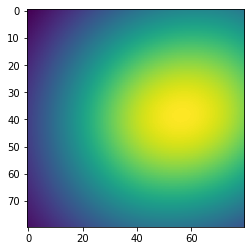

In [298]:
a = imgs[:,:,0].copy()
b = imgs[:,:,1].copy()

r = xcor(a,b)
imshow(r)
twomax(r)

0.025


(39, 48)

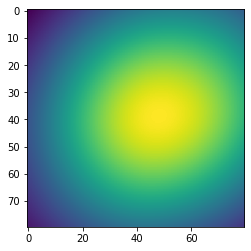

In [133]:
a = imgs[:,:,3].copy()
b = imgs[:,:,4].copy()

r = xcor(a,b)
imshow(r)
twomax(r)

(38, 40)

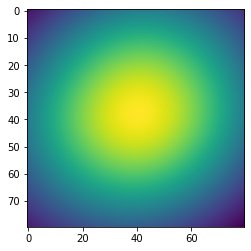

In [300]:
a = imgs[:,:,6].copy()
b = imgs[:,:,7].copy()

r = xcor(a,b)
imshow(r)
twomax(r)

# Conclusions on noiseless sims

It looks like every 12 microns of defocus the cross correlation peak by 0.2 pixels. The "FWHM" of this is apprixmately 2 pixels so that the signal to noise on the cross correlation needs to be 10.

How did you calculate this? Look at the outputs of the peak:
-24 micron shift: 16 deltapix
-12 micron shift:  8 deltapix
  0 micron shift:  0 deltapix
  
So that its a bout 8 deltapix per 12 micron.

Since the cross-correlation box is 80 pixels wide, and the cross correlation happens over +- 1 pixel, each step is 0.025 of a real pixel.

In [177]:
8*.025, 80*.025

(0.2, 2.0)

# Now to do the same but with Poisson noie

(38, 56)

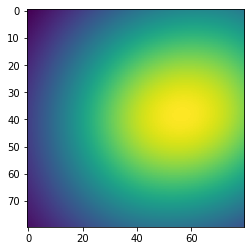

In [290]:
a = imgs[:,:,0].copy()
b = imgs[:,:,1].copy()

a /= np.max(a)
b /= np.max(b)

readnoise = 4


peak_signals = [1000, 3000, 10000, 30000]
res = {}

for peak_signal in peak_signals:
    
    coms = []
    
    for i in range(30):
        ra = np.random.poisson(a*peak_signal) + np.random.normal(scale=readnoise, size=ra.shape)
        rb = np.random.poisson(b*peak_signal) + np.random.normal(scale=readnoise, size=ra.shape)
        r = xcor(ra,rb)
        coms.append(ndi.center_of_mass(r))
    
    res[peak_signal] = np.array(coms)-40
    
imshow(r)
twomax(r)

In [291]:
rs = np.array(res[3000])

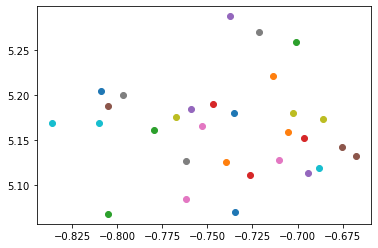

In [294]:
for r in rs:
    plot(*r, 'o')

In [295]:
print("%10s %5s" % ("Max Signal", "RMS [pix]"))
for signal, rs in res.items():
    print("%10s %8.3f" % (signal, np.std(rs[:,0])*1.414))

Max Signal RMS [pix]
      1000    0.364
      3000    0.208
     10000    0.144
     30000    0.063


In [297]:
measRMS = 0.063
goalRMS = 0.02

(measRMS/goalRMS)**2

9.9225

# Conclusions on noisy LVM Images

To get a 10 micron level defocus precision, you want a 5-sigma measurement of the cross correlation peak shift (0.2 pixels). From measurement book keeping, a strong 10-sigma measurement requires a 1-STD precision of 0.02 pixels.

Monte-Carlo simulations indicate that with a peak signal of 30,000 electrons in an emission line, the above cross-correlation anaylsis shows a RMS of 0.07 pixels, which is 3.5x larger than the required value. Thus we need to boost the signal by 12.3x which means we either need to average about 10 emission lines (this is easy) or boost the signal beyond the well capacity of the device.

TL;DR we need to have 13 emission lines with a peak signal of 30,000 photon in order to have a 1.2-micron (1 sigma SE) measurement.
